## **<span style="color:purple">Author Name: Mahrose Siddiqui</span>**

### **<span style="color:yellow">Author Email: mahrosesiddiqui18@gmail.com</span>**

### *CONNECT THROUGH*

[<img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="50" height="50">](https://www.linkedin.com/in/mahrose-siddiqui/)     [<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width="50" height="50">](https://www.kaggle.com/mahrosesiddiqui)  [<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="50" height="50">](https://github.com/MahroseSiddiqui)  [<img src="https://png.pngtree.com/png-vector/20221018/ourmid/pngtree-twitter-social-media-round-icon-png-image_6315985.png" width="50" height="50">](https://twitter.com/MahroseSiddiqui)  

## <center>**<span style="color:ORANGE">EXPLORATORY DATA ANALYSIS</span>**</center>

### **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

### **IMPORTING DATA**

In [2]:
df = pd.read_csv('data_cardiovascular_risk.csv')

### **SNAPSHOT OF THE DATA**

In [3]:
# Gives an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [4]:
# Display the first few rows of the DataFrame
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
# The shape of the DataFrame as a tuple, representing the number of rows and columns respectively
df.shape

(3390, 17)

In [6]:
# Retrieves a random sample of six rows from the DataFrame
df.sample(4)

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
2703  2703   47        2.0   M        YES        20.0     0.0   
1996  1996   44        2.0   M         NO         0.0     0.0   
167    167   43        2.0   M         NO         0.0     0.0   
1143  1143   34        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
2703                0             1         1    296.0  141.0   93.0  28.50   
1996                0             0         0    210.0  133.0   85.5  25.14   
167                 0             1         0    285.0  129.0   95.0  26.64   
1143                0             0         0    196.0  108.5   68.0  25.67   

      heartRate  glucose  TenYearCHD  
2703       68.0    332.0           1  
1996       75.0     90.0           0  
167        60.0     74.0           0  
1143       60.0     82.0           0

In [7]:
# Summary statistics of the numerical columns
df.describe() 

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [8]:
# Column names retrieval.
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
# Check for missing values
df.isnull().sum() 

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
#  The index of the row with the maximum value in the 'education' column is stored in the variable 'edu'.
edu = df['education'].idxmax()

# Replace the missing values (NaN) in the 'education' column of the dataframe 'df' with the value stored in the variable 'edu'.
df['education'].replace(np.nan, edu, inplace=True)


In [11]:
# now checking again the null values in education column
df['education'].isnull().sum()

0

In [12]:
# Calculate the average value excluding null values
avg_cigs = df['cigsPerDay'].mean()

# Replace null values with the average value
df['cigsPerDay'].replace(np.nan, avg_cigs, inplace=True)

In [13]:
# Replace null values in specific columns
df['BPMeds'].fillna(44, inplace=True)
df['totChol'].fillna(38, inplace=True)
df['BMI'].fillna(14, inplace=True)
df['heartRate'].fillna(1, inplace=True)
df['glucose'].fillna(304, inplace=True)

In [14]:
# Check for missing values
df.isnull().sum() 

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **<center><span style="color:ORANGE">DATA VISUALIZATION</span>**</center>

In [15]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='BPMeds', y='glucose', z='heartRate')

# Show the plot
fig.show()

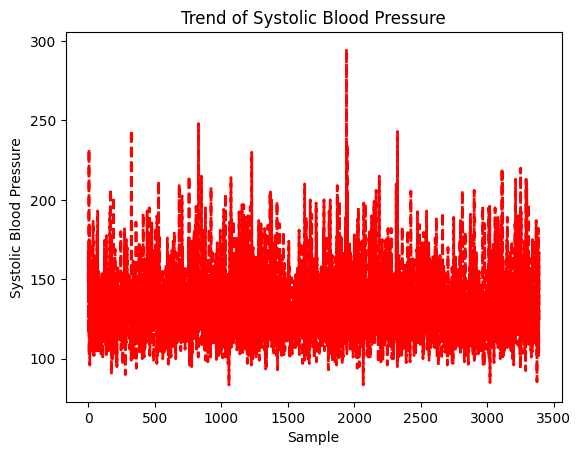

In [16]:
# Create a line plot
plt.plot(df['sysBP'], color='red', linewidth=2, linestyle='--')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Systolic Blood Pressure')
plt.title('Trend of Systolic Blood Pressure')

# Show the plot
plt.show()

In [17]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

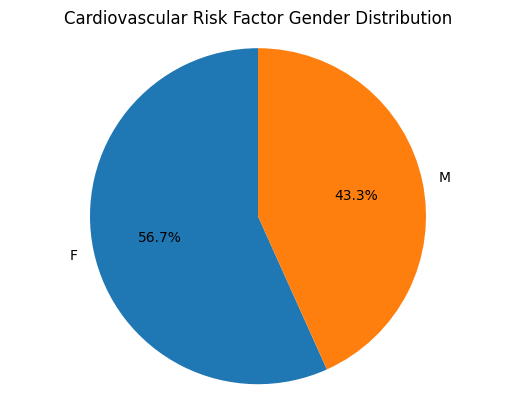

In [18]:
# Calculate the count for each category
count_by_sex = df['sex'].value_counts()

# Create a pie chart
plt.pie(count_by_sex, labels=count_by_sex.index, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Cardiovascular Risk Factor Gender Distribution')

# Set the aspect ratio to be equal, ensuring a circular pie chart
plt.axis('equal')

# Show the plot
plt.show()

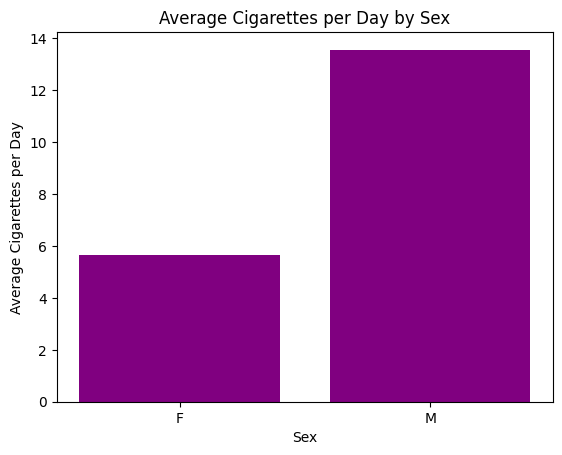

In [19]:
# Group the data by sex and calculate the mean of 'cigsPerDay'
grouped_df_s_cigs = df.groupby('sex')['cigsPerDay'].mean().reset_index()

# Create a bar plot with purple color
plt.bar(grouped_df_s_cigs['sex'], grouped_df_s_cigs['cigsPerDay'], color='purple')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Average Cigarettes per Day')
plt.title('Average Cigarettes per Day by Sex')

# Show the plot
plt.show()

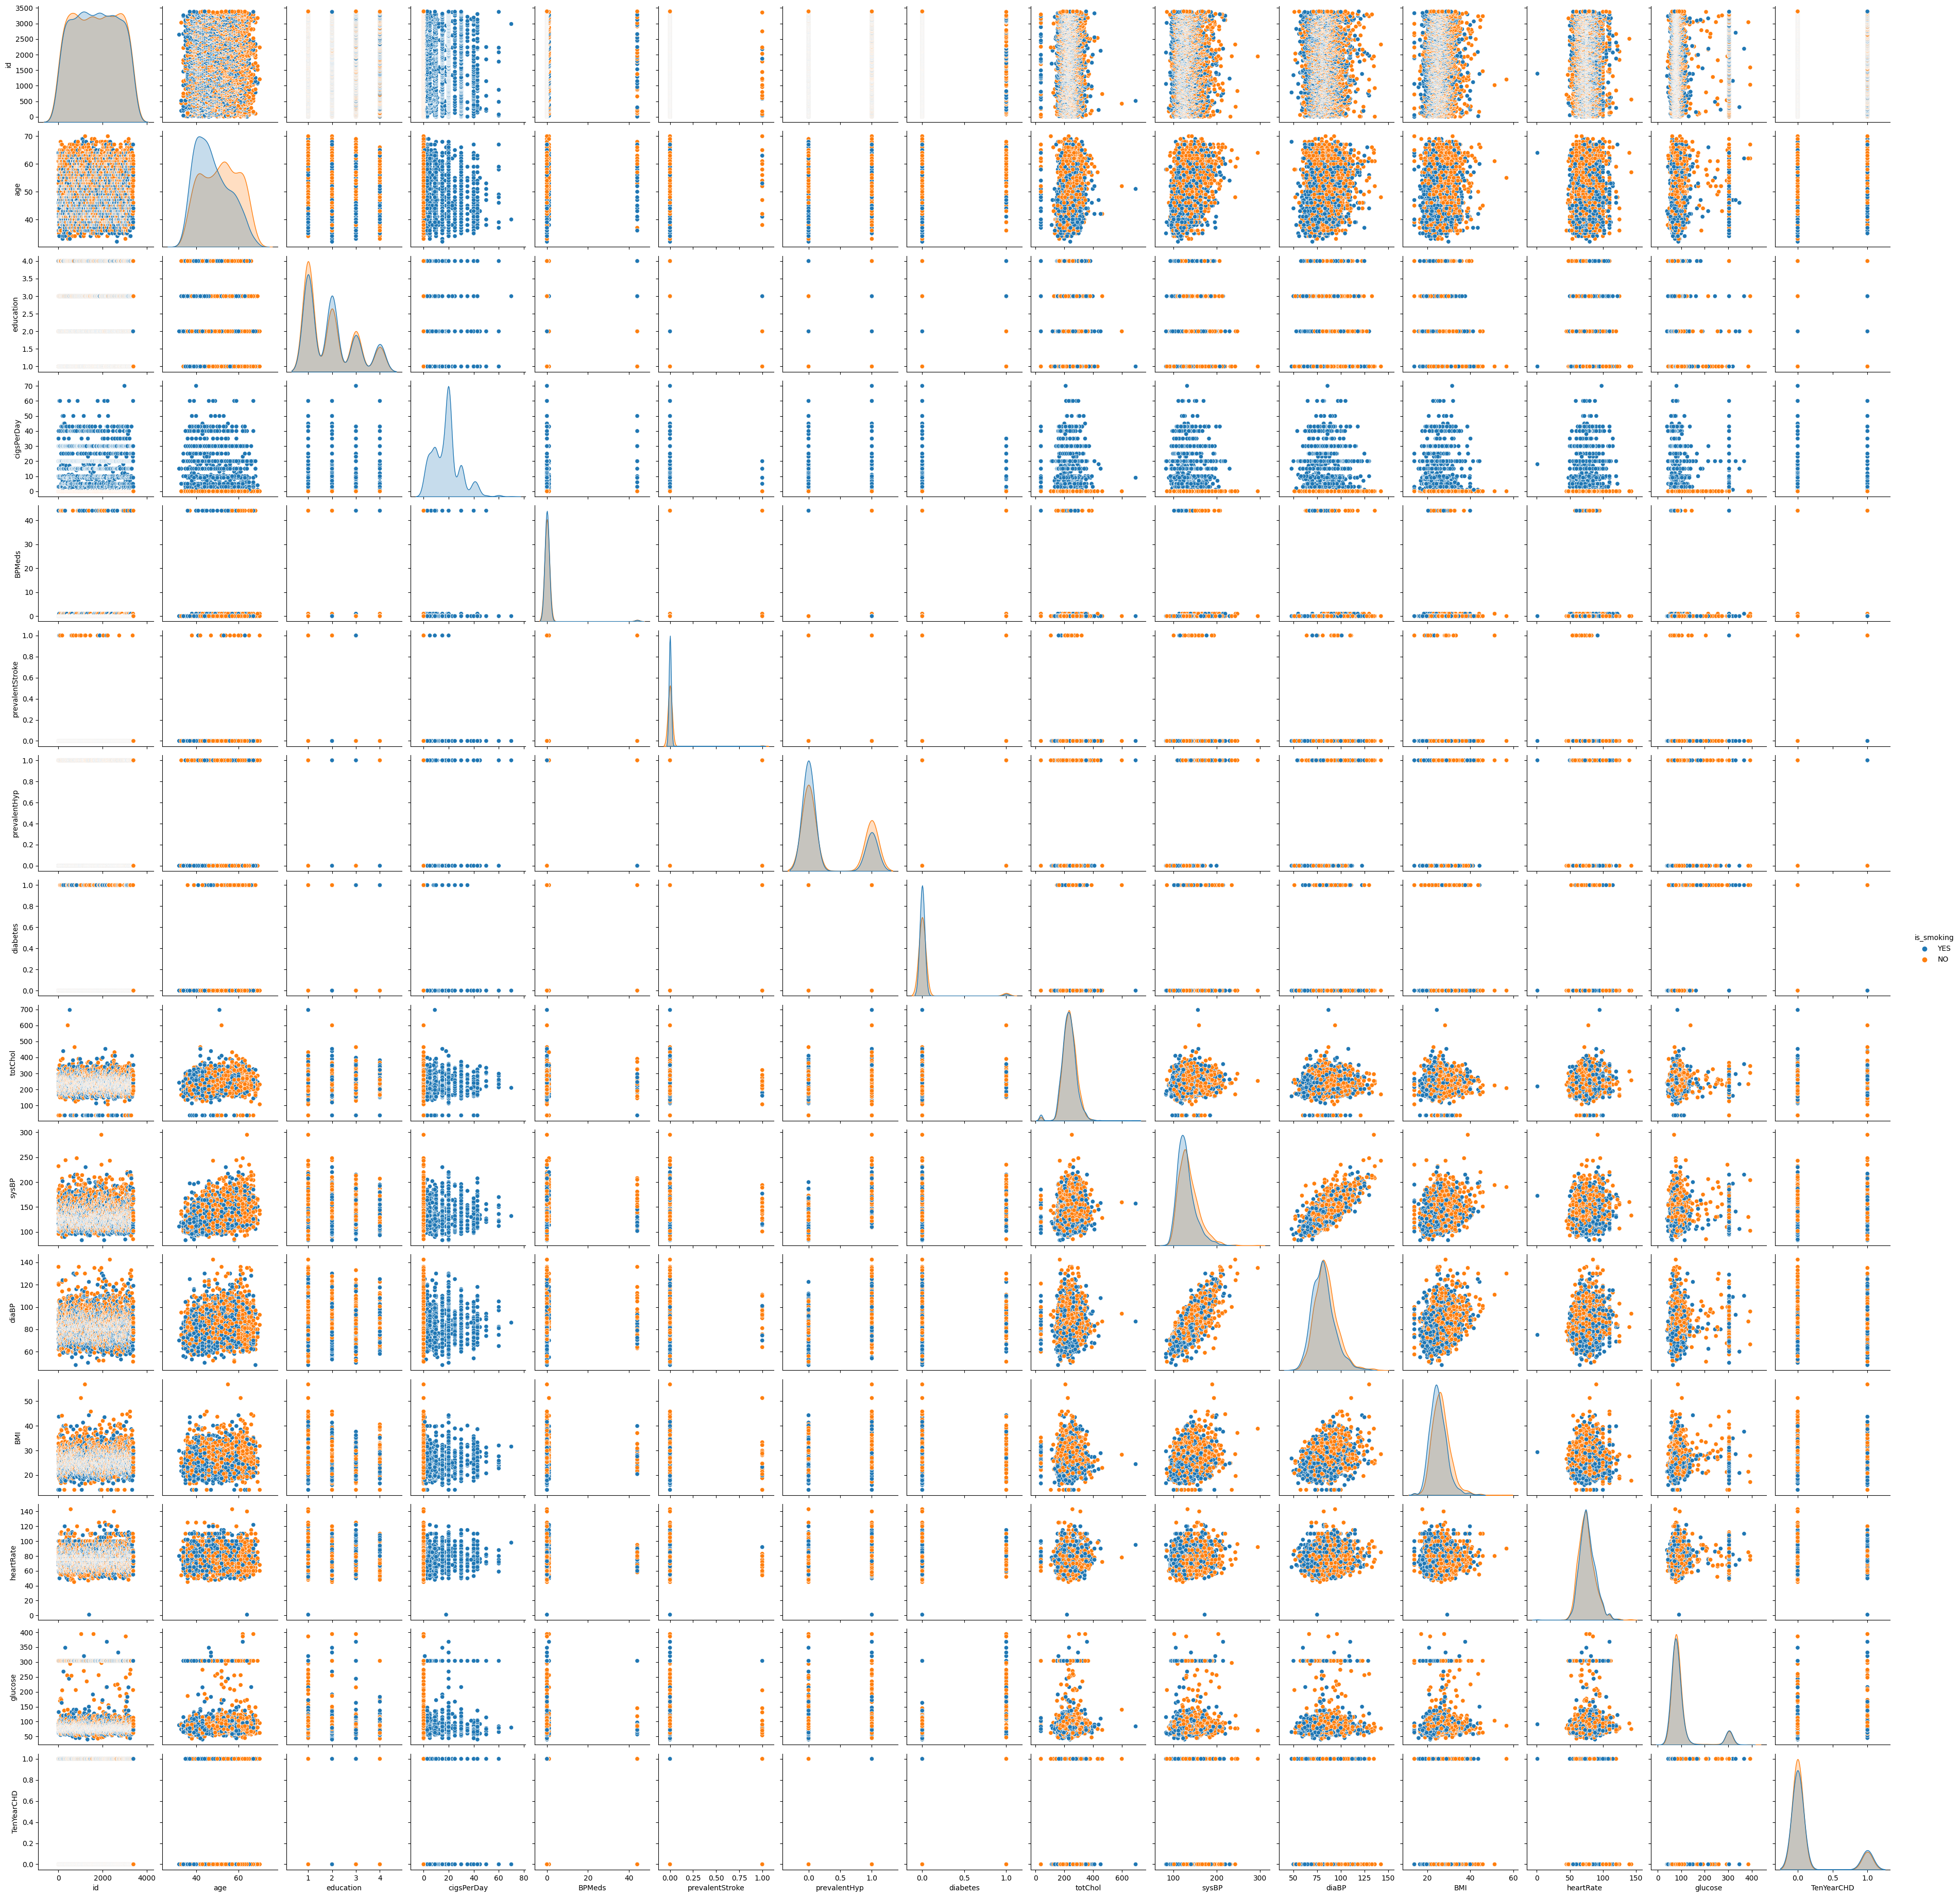

In [24]:
# Select the columns for the pair plot
columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
           'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Create the pair plot
sns.pairplot(df, hue="is_smoking")

# Show the plot
plt.show()

## <center>**<span style="color:ORANGE">MACHINE LEARINING ALGORITHM</span>**</center>

In [25]:
# Select the columns for the machine learning model
features = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
            'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Define the target variable
target = 'TenYearCHD'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

In [26]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create an instance of the logistic regression model
model = LogisticRegression(max_iter=1000)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean()}")

# Make predictions on the test data using the best model
predictions = best_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate classification report
print(classification_report(y_test, predictions))

Cross-Validation Scores: [0.6673913  0.64744287 0.66702938 0.66376496 0.65070729]
Average Cross-Validation Accuracy: 0.6592671618488906
Accuracy: 0.6858407079646017
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       581
           1       0.26      0.67      0.38        97

    accuracy                           0.69       678
   macro avg       0.60      0.68      0.58       678
weighted avg       0.83      0.69      0.73       678



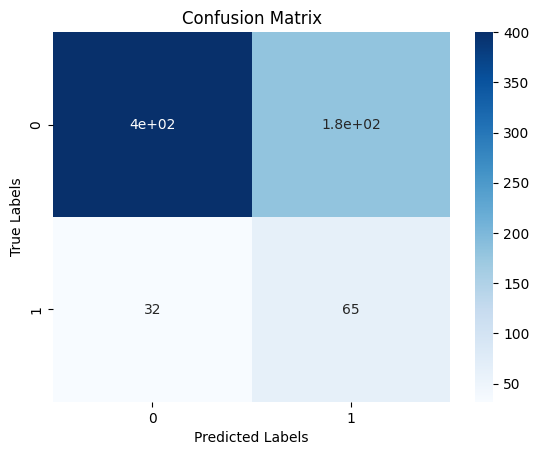

In [27]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()